<a href="https://colab.research.google.com/github/SamwelJane/Nairobi-Hospital-clinical-camp-test-for-hypothyroidism/blob/master/Nairobi_Hospital_Hypothyriodism_prediction_th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#  Introduction
Nairobi Hospital conducted a clinical camp to test for hypothyroidism.The data was  collected from Thyriod Patient

# 1.1 Defining the Question
Using the data provided , I'm tasked to build a model that determine whether or not  the patient's symptoms indicte that the patient has Hypothroid

# 1.2 Metrics for Success
 Optimalize  and come up with  reliable prediction Model 
 * That give an accuracy above 95%
 * Classify the patients  into two groups






# 1.3 Context

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.
Data source:

http://bit.ly/hypothyroid_data

# 1.4 Experimental design taken¶
 Perform EDA

 Perform Feature Engineering

 Build Models:

 Part 1: Decision Tree
 * Random Forest
 * AdaBoost
 * Gradient Boosted Tree

Part 2: Support Vector Machine(SVM)

Perform Hyperparameter Tuning in our Models

Compute accuarcy of each model and the confusion matrix

# 2.0 Importing Libraries we will use for our Analysis

In [0]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.5)
from sklearn.metrics import roc_auc_score

# check missing value percentage *(Self Defined Package)
#from missing_value.missing_values_table import missing_values_table

# Pipeline
from sklearn.pipeline import Pipeline

# DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# XGB
import xgboost as xgb

# cross_val_score
from sklearn.model_selection import cross_val_score

# DataframeMapper, CategoricalImputer
from sklearn_pandas import DataFrameMapper, CategoricalImputer

# Imputer
from sklearn.preprocessing import Imputer

# FeatureUnion
from sklearn.pipeline import FeatureUnion

# Function Transformer
from sklearn.preprocessing import FunctionTransformer

# check missing value percentage 

#  import decision tree classifier module from Decision tree librarie
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix


# 2.1 Viewing our Datasets

In [3]:
#  loading the dataset and previewing the first five rows
#  datasource = 'http://bit.ly/hypothyroid_data'
#  my daaframe will be called data

data = pd.read_csv('http://bit.ly/hypothyroid_data')
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


# 2.2 Exploratory Data Analysis

In [4]:
#  listing all columns in our datasets.
#  thees will be the variables  that are affectin our target variable which is 'Status'
list(data)

['status',
 'age',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'TSH',
 'T3_measured',
 'T3',
 'TT4_measured',
 'TT4',
 'T4U_measured',
 'T4U',
 'FTI_measured',
 'FTI',
 'TBG_measured',
 'TBG']

In [5]:
#  checking the shape of our dataset
data.shape

(3163, 26)

In [6]:
#  checking an overview information about our dataset
 data.info() 
#   the dataset has 3163 rows and 26 columns which are our variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

* All columns  have dtype object.No categorical or numerical columns
* Also the dataset has missing values which are indicated by '?'

### Replace '?' with Null


In [7]:
 # since pandas doeas does not recorgnise ? as null, the code below hepls us to convert it null
  data.replace('?',np.nan,inplace=True)
  data.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n,NaN
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.70,y,1.30,y,54,y,0.86,y,63,n,NaN
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.90,y,34,y,1.05,y,32,n,NaN
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,NaN,y,39,y,1.21,y,32,n,NaN
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,NaN,y,7.60,y,1.02,y,7.50,n,NaN


In [0]:
#  convert to numerical
num_cols = ['age','TSH','T3','TT4','T4U','FTI']

In [0]:
cate_cols = ['status','sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre','TSH_measured','T3_measured','TT4_measured',
      'T4U_measured','FTI_measured','TBG_measured', 'TBG']

In [0]:
# converting   objects to categorical

data[cate_cols] = data[cate_cols].astype('category')
      

In [0]:
#convert  object to numerical
data[num_cols] = data[num_cols].apply(pd.to_numeric)

In [12]:
#  checking datatpyes
data.dtypes
# all the features in our are in an object format

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                          category
dtype: objec

In [13]:
data['TBG'].unique()

[NaN, 28, 34, 0, 19, ..., 65, 7.30, 8.50, 69, 122]
Length: 53
Categories (52, object): [28, 34, 0, 19, ..., 7.30, 8.50, 69, 122]

In [0]:
data.columns
n =['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']

In [18]:

# check the number of unique values per column
data[n].apply(lambda x: x.nunique(), axis=0)

status                         2
age                           92
sex                            2
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          239
T3_measured                    2
T3                            69
TT4_measured                   2
TT4                          268
T4U_measured                   2
T4U                          158
FTI_measured                   2
FTI                          280
TBG_measured                   2
TBG                           52
dtype: int64

In [19]:
# define the numerical imputer
# Impute null values by replacing them median.
impute = Imputer(strategy ='median')
data[num_cols] = impute.fit_transform(data[num_cols])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
# replace categorical values with mode('most frequent')


data['TBG'] = data['TBG'].fillna(data['TBG'].mode()[0])



data['sex'] = data['sex'].fillna(data['sex'].mode()[0])

In [23]:
#  checking for null values
data.isnull().sum().sum()

0

In [24]:
data['status'].unique()

[hypothyroid, negative]
Categories (2, object): [hypothyroid, negative]

In [25]:

# creating a dict file  
status = {'hypothyroid': 'Yes','negative': 'No'} 
  
# traversing through dataframe 
# Gender column and writing 
# values where key matches 
data.status = [status[item] for item in data.status] 
print(data.head())

  status   age sex on_thyroxine  ... FTI_measured   FTI TBG_measured TBG
0    Yes  72.0   M            f  ...            y  10.0            n  28
1    Yes  15.0   F            t  ...            y  17.0            n  28
2    Yes  24.0   M            f  ...            y   0.0            n  28
3    Yes  24.0   F            f  ...            y   6.0            n  28
4    Yes  77.0   M            f  ...            y  44.0            n  28

[5 rows x 26 columns]


# 2.2 Feature Engineering

In [0]:
#  checking for duplicates
#  The duplicate   occurs when an exact copy of a record is created as a different entry in the same database.
data.duplicated().sum()

78

In [0]:
# I have opted to drop duplicates  in order to avoid redundancies,inconsistencies and complimicing accuracy of my model
#  After  removing the duplicate i will call my dataframe df

df=data.drop_duplicates(keep=False)


In [0]:
# checking the number of feaures I have remained with which is 3010 from the prevous one which was 3163
len(df)

3008

In [0]:
#  checking  for null values
# 
df.isnull().sum()
#  the dataset contain values and in the next cell i will show you how i will deal with them
#  8/26 columns had  missing values where variable  TBG  had the highest number of missing values foolwed by T3

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [0]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,51.555485,5.150354,1.909042,108.468195,0.976772,114.741985
std,17.909384,22.137871,0.882341,43.677305,0.217568,57.882814
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000
75%,64.000000,1.800000,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


<Figure size 1200x800 with 0 Axes>

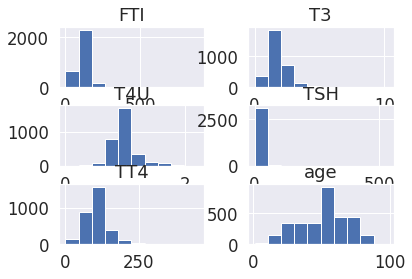

In [83]:
plt.figure(dpi=200)
data.hist()

plt.show()
# the graph shows the distribution our numerical data

In [0]:
data.max()
#  In as much as  most patients  were  not suffering from Hypothriodism,
#  the list below shows some the top condition/state at which someone would be negative
#  This is a conclusive decision but I will try to check with the Models i shall use 

status                        Yes
age                            98
sex                             M
on_thyroxine                    t
query_on_thyroxine              t
on_antithyroid_medication       t
thyroid_surgery                 t
query_hypothyroid               t
query_hyperthyroid              t
pregnant                        t
sick                            t
tumor                           t
lithium                         t
goitre                          t
TSH_measured                    y
TSH                           530
T3_measured                     y
T3                           10.2
TT4_measured                    y
TT4                           450
T4U_measured                    y
T4U                          2.21
FTI_measured                    y
FTI                           881
TBG_measured                    y
TBG                          9.30
dtype: object

In [0]:
data.min()
#  for someone to be be having hypothyroid  he /she had this minimum number of variables

status                       No
age                           1
sex                           F
on_thyroxine                  f
query_on_thyroxine            f
on_antithyroid_medication     f
thyroid_surgery               f
query_hypothyroid             f
query_hyperthyroid            f
pregnant                      f
sick                          f
tumor                         f
lithium                       f
goitre                        f
TSH_measured                  n
TSH                           0
T3_measured                   n
T3                            0
TT4_measured                  n
TT4                           2
T4U_measured                  n
T4U                           0
FTI_measured                  n
FTI                           0
TBG_measured                  n
TBG                           0
dtype: object

In [0]:
# checking the most age of patients who participated in this sampling excercise
print('age mode', data['age'].mode())

# majority of the patients who particicpated where in the age of 59 years


age mode 0    54.0
dtype: float64


In [66]:
age

1462    54.0
264     54.0
Name: age, dtype: float64

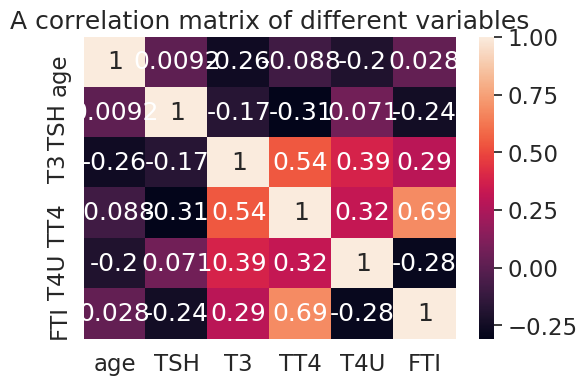

In [134]:

#  checking for corraltion
# A lighter shade shows that the relationship between the variables i
plt.figure(dpi=100)

sns.heatmap(data.corr(),annot=True)
plt.title('A correlation matrix of different variables')

plt.show()

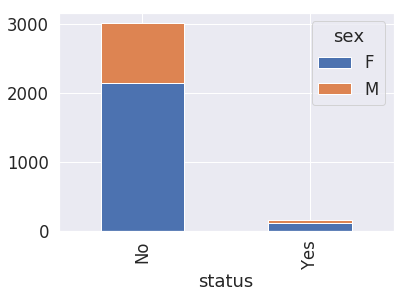

In [135]:
data.groupby(['status','sex']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

# the graph shows that Female were suffering from disease than men and out of the total participant negative was high

In [65]:
status

['Yes', 'No']

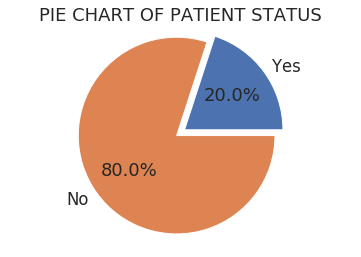

In [133]:
# Distribution of Hypothtriodism in relation to age

#plt.figure(dpi = 100)
status = data['status'].unique().tolist()
age = data['age'].sample(2,random_state=0)
explode = [0,0.1]
plt.pie(age,explode= explode,labels=status,autopct ='%1.1f%%',shadow =False)
plt.axis('equal')

plt.title('PIE CHART OF PATIENT STATUS')
plt.show()
#  The data shows that out of the total number of patients who participated in this excercise 20% had hypothyoroid while 56.7% tested negative

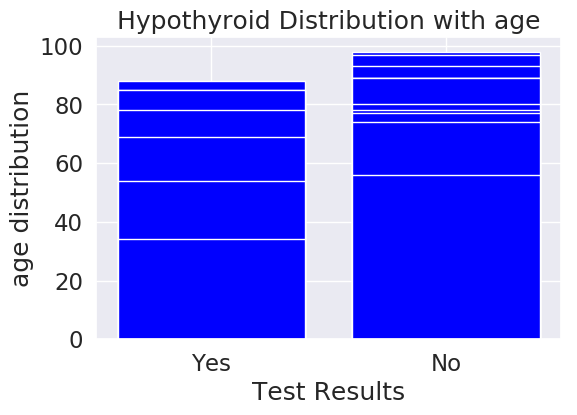

In [85]:
plt.figure(dpi=100)

status = data['status']
age = data['age']
plt.bar(status,age,color ='blue')
plt.xlabel('Test Results')
plt.ylabel('age distribution')
plt.title('Hypothyroid Distribution with age')
plt.show()


In [0]:
# Since i have already cleaned my dataset set and carried out EDA as well as Feature Engineering, I will now split the dataset to Y and X
#  y is my depended variable(status) while X is my independent varaibles

#  separating my dataset to target(y)
y = data['status'].values

#  separating the x from the origina daataset. i  will do this by dropping my target column which is 'status'
ss = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']

Z = data[ss]


In [0]:
#  since we have some  strings  that will not in our model we ill convert the to dummies

X = pd.get_dummies(Z)

In [30]:
#  checking shape of X
X.shape
#  X has 30163 columns and 94 variable features

(3163, 94)

In [31]:
#  checking y shape
y.shape

(3163,)

In [0]:
X.head()

,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,...,TBG_19,TBG_20,TBG_21,TBG_22,TBG_23,TBG_24,TBG_25,TBG_26,TBG_27,TBG_28,TBG_29,TBG_3.10,TBG_30,TBG_31,TBG_32,TBG_33,TBG_34,TBG_35,TBG_36,TBG_37,TBG_38,TBG_39,TBG_40,TBG_41,TBG_43,TBG_45,TBG_47,TBG_48,TBG_50,TBG_52,TBG_53,TBG_63,TBG_65,TBG_69,TBG_7.30,TBG_8.40,TBG_8.50,TBG_80,TBG_86,TBG_9.30
0,72.0,30.0,0.6,15.0,1.48,10.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,145.0,1.7,19.0,1.13,17.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,24.0,0.0,0.2,4.0,1.00,0.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,24.0,430.0,0.4,6.0,1.04,6.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,77.0,7.3,1.2,57.0,1.28,44.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#  spliting the dataset to train and test
# During our modelling we will use a 80% as our training sqmple and 20 as the Test
#  a random_state of 0
 X_train,X_test,y_train,y_test  = train_test_split(X,y, test_size = 0.2, random_state=0)

# 3.Modeling

* From the data i was provided with, my work was to predict whether given the feayures I have in the data set,Patient will be suffering from Hypothyroidism or not.
* The question requires me to determines whether or not the patient's symptoms indicate that the patient has hypothyroid
* That means i will use A *classifier* instead of *Regressor* since my target variable is not  continous
* During my classification I will use Different approaches/models to test and see which model will be able to classify my target  correctly.
 * the correctness of my  model will be accessed using ***accuracy*** and ***confusion matrix*** 
 * the model will use include 
 * Decision Tree:
   * Random Forest, 
   * AdaBoosted Tree
   * Gradient Boosted Tree
 * Support Vector Machine( SVM)

## 3.0 Decision Tree

In [0]:
??DecisionTreeClassifier

In [121]:
# creating a decision tree classifier
decision =DecisionTreeClassifier(max_depth=4,min_samples_split=2,splitter='best')

# train it based on ourtraining set
decision.fit(X_train,y_train)




DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:

# Predict based on the model we've trained
y_pred_decision = decision.predict(X_test)

In [123]:

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Decison_Accuracy:",metrics.accuracy_score(y_test, y_pred_decision))
 # after using parameter the  accuarcy changed from 97.6 % to 98.7% the accuracy does not go beyond 98.74%

Decison_Accuracy: 0.9873617693522907


In [0]:
#  computing the confusion matrix

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Confusion matrrix:",metrics.confusion_matrix(y_test, y_pred_decision))
# before parameters my model predicted 618/631 correctly but after using the parameter the number increased to  625/631 correctly
# only 8 points were misclassied

Confusion matrrix: [[602   5]
 [  3  23]]


In [0]:
confusion_matrix = confusion_matrix(y_test,y_pred_decision)
confusion_matrix



## 3.1 Random Forest
 Random forest is a type of Decision only that it complices  of many decision trees which have beeen selected randomly

In [0]:
#  spliting the dataset to train and test
# During our modelling we will use a 80% as our training sqmple and 20 as the Test
#  a random_state of 0
 X_train,X_test,y_train,y_test  = train_test_split(X,y, test_size = 0.2, random_state=0)

In [100]:
#  Import randomforestClassifier
random =RandomForestClassifier(max_depth=3, min_samples_split=2, n_estimators=10, random_state=2)
#  fitting our train in the model
random.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [0]:
#  predicting  based on the model we  have trained
y_pred_random = random.predict(X_test)



In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = random.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())


In [102]:
# computing the accuarcy
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("random_Accuracy:",metrics.accuracy_score(y_test, y_pred_random))

# #  the model gave  98.10 accuarcy score  before using parameter to optimize it
# before tunning the model gave a lower value interms of accuarcy which was 96.2%

random_Accuracy: 0.9747235387045814


In [0]:
#  computing the confusion matrix

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Confusion matrrix:",metrics.confusion_matrix(y_test, y_pred_random))
# before parameters my model predicted 621/633 correctly but after using the parameter the number increased to  6/633 correctly
# only 12 points were misclassified

Confusion matrrix: [[602   5]
 [  7  19]]


* random forest gave us a 95 accuarcy score
* Out of the total number of 631 which 20 % sample .
* The model was able to predict 617 correectly
* The model predicted 604 patients were negative while in the actual they wrere negative.
* The model also predicted 13  patients tested postive  while in the actual sense they had it.
* The model predicted  16 patients wrongly.

## 3.2 AdaBoosted Tree

In [117]:
#  since had splitted our data to train and test we don't need to split again all we need to go dirctlt to creating our model
ada_boost = AdaBoostClassifier(learning_rate=1.0,n_estimators=100,random_state= 20)

#  fitting our train set
ada_boost.fit(X_train,y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=20)

In [0]:
#  making prediction based on our X_test set
y_pred_ada = ada_boost.predict(X_test)

In [119]:

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("adaboost_Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))

adaboost_Accuracy: 0.981042654028436


In [0]:
#  computing the confusion matrix

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Confusion matrrix:",metrics.confusion_matrix(y_test, y_pred_ada))

Confusion matrrix: [[600   7]
 [  5  21]]


## 3.3 Gradient Boosted Tree

In [95]:
#  what we did did on adaBoosting is what we  will  do on Gradient Boosting

gradient = GradientBoostingClassifier(learning_rate =0.1,n_estimators=100,max_depth=3,min_samples_split=2) # defining my classifier as  gradient

#  fiiting my train in the classifier

gradient.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
#  making prediction based on wh the model we have created
y_pred_gradient = gradient.predict(X_test)

In [142]:
#from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("gradient_Accuracy:",metrics.accuracy_score(y_test, y_pred_gradient))
# before 

gradient_Accuracy: 0.9842022116903634


In [144]:
#  computing the confusion matrix

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Confusion matrrix:",metrics.confusion_matrix(y_test, y_pred_gradient))

Confusion matrrix: [[600   7]
 [  3  23]]


# 4.0 Support Vector Machine(SVM)
* Svm is another type of  model that is used mostly for classification especially when working with  features that are highly related.E.g Drug disambiguation
* In this task we are suppose to determine whether a patient will test positive or negative when hypothyroid is test.
* To determine  this prediction, our data has many faetures that are highly related to  our case study.

In [0]:
#  Building SVM model
#  i shall use Support vector Classifier(SVC) since am handling a classier problem
svm  = SVC(kernel = 'linear',C=1.0,gamma='auto_deprecated',random_state=2)
svm_1 = SVC(kernel = 'rbf',C=1.0,gamma='auto_deprecated',random_state=2)

# my represented regularization,i used it to show the missiclassification
# rbf was used to increase the the dimension

In [139]:
#  fitting the train into the nodel
svm.fit(X_train,y_train)
svm_1.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=2,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
# making prediction
y_pred_svc = svm.predict(X_test)
y_pred_svc_1 = svm_1.predict(X_test)

In [141]:

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("svc_Accuracy with linear karnel:",metrics.accuracy_score(y_test, y_pred_svc))
# before 
print("svc_1_Accuracy with rbf karnel:",metrics.accuracy_score(y_test, y_pred_svc))

svc_Accuracy with linear karnel: 0.976303317535545
svc_1_Accuracy with rbf karnel: 0.976303317535545


* Before  using parameters the model gave an accuracy of  97.63 %

In [39]:
#  computing the confusion matrix

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Confusion matrrix:",metrics.confusion_matrix(y_test, y_pred_svc))

Confusion matrrix: [[601   6]
 [  9  17]]


In [105]:
importance = random.feature_importances_
names = X.columns
random_1 ={}
for name ,imp in zip(names,importance):
  random_1[name]= imp
random_1
from collections import OrderedDict
OrderedDict(sorted(random_1.items(),key =lambda x:x[1],reverse=True))
# the top three variables that affected our model were TT4,FTI and TSH

OrderedDict([('TT4', 0.3430984339588684),
             ('FTI', 0.2897183293767405),
             ('TSH', 0.09397986217688785),
             ('T3', 0.0929790959620722),
             ('query_hypothyroid_t', 0.04173094879434944),
             ('age', 0.027695063589511303),
             ('TBG_measured_n', 0.02704160766245988),
             ('T3_measured_y', 0.022356290388295272),
             ('TSH_measured_y', 0.01635505047483484),
             ('T4U', 0.016203545817568717),
             ('TT4_measured_y', 0.00657913146020257),
             ('TBG_measured_y', 0.006021795408828595),
             ('thyroid_surgery_t', 0.005849386882935441),
             ('TSH_measured_n', 0.004048249715711423),
             ('sex_M', 0.003903066284799447),
             ('query_on_thyroxine_t', 0.001087910319313352),
             ('on_thyroxine_f', 0.0007133695762925885),
             ('thyroid_surgery_f', 0.00046385355747903306),
             ('sick_t', 0.00017118467698896522),
             ('TBG_28', 3.542

In [143]:
 # A summary of my accuracy score for different models that i used
print("Decison_Accuracy:",metrics.accuracy_score(y_test, y_pred_decision))  
print("random_Accuracy:",metrics.accuracy_score(y_test, y_pred_random))  
print("adaboost_Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))
print("gradient_Accuracy:",metrics.accuracy_score(y_test, y_pred_gradient))
print("svc_Accuracy with linear karnel:",metrics.accuracy_score(y_test, y_pred_svc)) 
print("svc_1_Accuracy with rbf karnel:",metrics.accuracy_score(y_test, y_pred_svc))

Decison_Accuracy: 0.9873617693522907
random_Accuracy: 0.9747235387045814
adaboost_Accuracy: 0.981042654028436
gradient_Accuracy: 0.9842022116903634
svc_Accuracy with linear karnel: 0.976303317535545
svc_1_Accuracy with rbf karnel: 0.976303317535545


# Summary
 I used different Model to test and predict a negative or positive
 The model that worked best in this data set was  gradient Boost since it had a high accuarcy.
 The model was able to predict 623/633 correctly.
 
 Only 10 points were misclassified.
 In as  much we have taken Gradient Boosting as our model  to use, I can conclusively say that  all the model I usd conformed to the Metrics since they gave me an Accuracy of more than 95%

# Fitness of the Dataset.

 Since our dataset contained null values in form of ? it was to tell whether the ? was null value
